In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
plt.style.use('fivethirtyeight')

In [3]:
datetime.now().date() - timedelta(1)

datetime.date(2021, 4, 5)

In [12]:
imported_data = []
auctionTable = []
expandedAuction = []
uniqueTime = []
uniqueTimeDay = []
uniqueTimeDate = []

feastCost = [[],[],[],[],[],[],[]]
#ribsCost = [[],[],[],[],[],[],[]]
#haunchCost = [[],[],[],[],[],[],[]]
#pikeCost = [[],[],[],[],[],[],[]]
#piranhaCost = [[],[],[],[],[],[],[]]
#thadeCost = [[],[],[],[],[],[],[]]

allFeasts = []
statsDaily = [[],[],[],[],[],[],[]]

with open("WarcraftAuctionData.txt", "r") as data_file:
    for row in data_file:
        tempRow = row.strip()
        tempRow = tempRow.split(",")
        imported_data.append(list(tempRow))

# Adding a weekend flag since most feasts are used in raids and people raid on weekends
        
weekendList = ['Friday','Saturday','Sunday']

# Narrow the data to one week, from yesterday to a week ago from yesterday
weekBegin = datetime.now().date() - timedelta(8)
weekEnd = datetime.now().date() - timedelta(2)

# Formatting the ints back to int and concatenating the date and time back to datetime

for row in range(0, len(imported_data)):
    imported_data[row][4] = int(imported_data[row][4])
    imported_data[row][5] = int(imported_data[row][5])
    imported_data[row][7] = datetime.combine(datetime.strptime(imported_data[row][6], '%x').date(),datetime.strptime(imported_data[row][7], '%X').time())
    if imported_data[row][8] in weekendList:
        imported_data[row][9] = 1
    else:
        imported_data[row][9] = 0
    del imported_data[row][6]
    del imported_data[row][3]
    del imported_data[row][1]

# Get distinct day and datetime lists. Used for time series

for row in range(0, len(imported_data)):
    if imported_data[row][4] not in uniqueTime and imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        uniqueTime.append(imported_data[row][4])
    if imported_data[row][5] not in uniqueTimeDay and imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        uniqueTimeDay.append(imported_data[row][5])
    if imported_data[row][4].date() not in uniqueTimeDate and imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        uniqueTimeDate.append(imported_data[row][4].date())

# Change the format of the auctions to be one auction per row. Each item has its own list
    
for row in range(0, len(imported_data)):
    iterations = imported_data[row][2]
    if imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        for numbers in range(0, iterations):
            if imported_data[row][1] == 'Feast of Gluttonous Hedonism':
                feastCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3]/10000)
#            if imported_data[row][1] == 'Tenebrous Ribs':
#                ribsCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Phantasmal Haunch':
#                haunchCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Silvergill Pike':
#                pikeCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Spinefin Piranha':
#                piranhaCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Elysian Thade':
#                thadeCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
                allFeasts.append(imported_data[row][3]/10000)
for day in range(0, len(feastCost)):
    statsDaily[day].append(np.percentile(feastCost[day],25))
    statsDaily[day].append(np.percentile(feastCost[day],50))
    statsDaily[day].append(np.percentile(feastCost[day],75))

In [13]:
uniqueTimeDate

[datetime.date(2021, 3, 29),
 datetime.date(2021, 3, 30),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 1),
 datetime.date(2021, 4, 2),
 datetime.date(2021, 4, 3),
 datetime.date(2021, 4, 4)]

In [36]:
uniqueTime

[datetime.datetime(2021, 3, 29, 20, 0, 4),
 datetime.datetime(2021, 3, 29, 21, 0, 5),
 datetime.datetime(2021, 3, 29, 22, 0, 5),
 datetime.datetime(2021, 3, 29, 23, 0, 5),
 datetime.datetime(2021, 3, 30, 0, 0, 6),
 datetime.datetime(2021, 3, 30, 1, 0, 5),
 datetime.datetime(2021, 3, 30, 2, 0, 6),
 datetime.datetime(2021, 3, 30, 3, 0, 5),
 datetime.datetime(2021, 3, 30, 4, 0, 5),
 datetime.datetime(2021, 3, 30, 5, 0, 6),
 datetime.datetime(2021, 3, 30, 6, 0, 4),
 datetime.datetime(2021, 3, 30, 7, 0, 6),
 datetime.datetime(2021, 3, 30, 8, 0, 6),
 datetime.datetime(2021, 3, 30, 9, 0, 6),
 datetime.datetime(2021, 3, 30, 10, 0, 6),
 datetime.datetime(2021, 3, 30, 11, 0, 5),
 datetime.datetime(2021, 3, 30, 12, 0, 6),
 datetime.datetime(2021, 3, 30, 13, 0, 5),
 datetime.datetime(2021, 3, 30, 14, 0, 4),
 datetime.datetime(2021, 3, 30, 15, 0, 6),
 datetime.datetime(2021, 3, 30, 16, 0, 6),
 datetime.datetime(2021, 3, 30, 17, 0, 4),
 datetime.datetime(2021, 3, 30, 18, 0, 6),
 datetime.datetime(20

In [14]:
statsDaily

[[2244.9, 2244.9, 2245.0],
 [2244.9, 2244.9, 2500.69],
 [2899.73, 2899.74, 2899.77],
 [2899.5, 2899.7, 2899.71],
 [2700.39, 2750.49, 2750.49],
 [2399.97, 2399.99, 2400.28],
 [2350.69, 2395.87, 2395.88]]

In [15]:
np.max(np.max(statsDaily))

2899.77

In [16]:
np.min(np.max(feastCost))

2399.99

In [17]:
df = pd.DataFrame(statsDaily)

In [18]:
#Lowest median
df[1].min()

2244.9

In [19]:
#Highest median
df[1].max()

2899.74

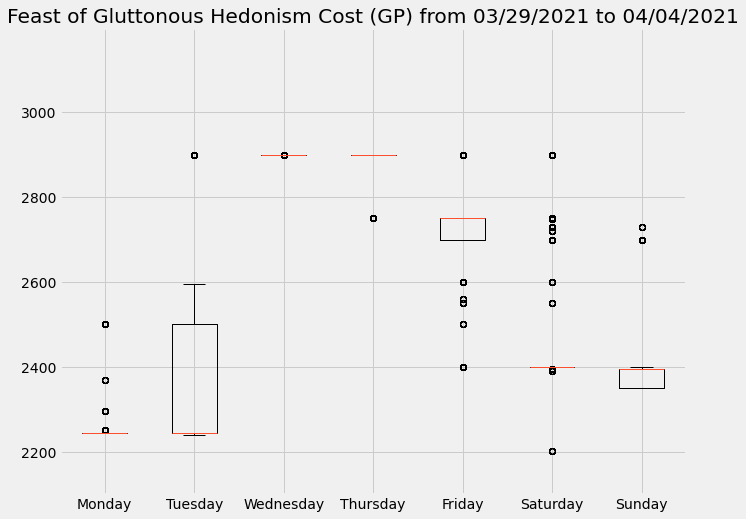

In [35]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
# https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

plt.boxplot(feastCost, labels = uniqueTimeDay)
plt.ylim(np.min(np.max(feastCost)) - 300,np.max(np.max(statsDaily)) + 300)
plt.rcParams["figure.figsize"] = (10, 8)
plt.title('Feast of Gluttonous Hedonism Cost (GP) from '+ str(weekBegin)[-5:-3] + '/' + str(weekBegin)[-2:]+ '/' + str(weekBegin)[-10:-6] + ' to ' + str(weekEnd)[-5:-3] + '/' + str(weekEnd)[-2:]+ '/' + str(weekEnd)[-10:-6])
plt.show()